In [144]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# read dataset
divvy_df = pd.read_csv("202307-divvy-tripdata.csv")
divvy_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656944,41.882752,-87.641190,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


In [146]:
# check information of our dataset like number of rows, cols, dtypes
divvy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             767650 non-null  object 
 1   rideable_type       767650 non-null  object 
 2   started_at          767650 non-null  object 
 3   ended_at            767650 non-null  object 
 4   start_station_name  644707 non-null  object 
 5   start_station_id    644707 non-null  object 
 6   end_station_name    637346 non-null  object 
 7   end_station_id      637346 non-null  object 
 8   start_lat           767650 non-null  float64
 9   start_lng           767650 non-null  float64
 10  end_lat             766396 non-null  float64
 11  end_lng             766396 non-null  float64
 12  member_casual       767650 non-null  object 
dtypes: float64(4), object(9)
memory usage: 76.1+ MB


In [147]:
# change data types from object to datetime 
divvy_df[["started_at","ended_at"]] = divvy_df[["started_at","ended_at"]].apply(pd.to_datetime)

In [148]:
# create new column of duration
divvy_df["duration_min"] = (divvy_df["ended_at"]-divvy_df["started_at"]).astype('timedelta64[m]')

In [149]:
# create new column of hour when ride started
divvy_df["started_hour"] = divvy_df["started_at"].dt.hour

In [150]:
# create new of week days when rides were started
divvy_df["started_day"] = divvy_df["started_at"].dt.day_name()

In [151]:
# check if data contains null values
divvy_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122943
start_station_id      122943
end_station_name      130304
end_station_id        130304
start_lat                  0
start_lng                  0
end_lat                 1254
end_lng                 1254
member_casual              0
duration_min               0
started_hour               0
started_day                0
dtype: int64

In [152]:
# calclute five percent of length
threshold = len(divvy_df)*.05
threshold

38382.5

In [153]:
# find columns that have sum of null values less then threshold
cols_to_drop = divvy_df.columns[divvy_df.isnull().sum()<=threshold]
# drop rows for filtered columns
divvy_df.dropna(subset=cols_to_drop,inplace=True)


Question: Which Bike Types are popular and which are not?

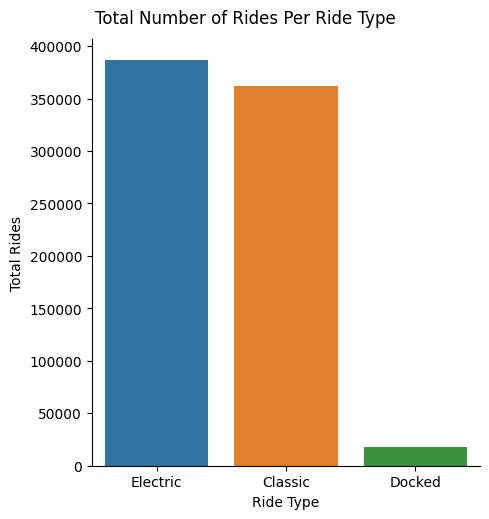

In [154]:
# create a count plot for rideable_type
g = sns.catplot(x="rideable_type",
            data=divvy_df,
            kind="count",
            )
# set figure title
g.fig.suptitle("Total Number of Rides Per Ride Type",
               y=1.03)
# set xlabel and ylabel
g.set(xlabel="Ride Type",
      ylabel = "Total Rides")
# change x ticks
plt.xticks([0,1,2],["Electric","Classic","Docked"])

# show plot
plt.show()

Answer: By looking at the chart we can see that electric bikes are most popular then classic and least popular are docked bikes.

Question: Does member type affect the choice of rides?

In [155]:
#group member_casual and rideable_type and count the rides
ridetype_compar = divvy_df.groupby(["member_casual","rideable_type"], as_index=False)[["ride_id"]].count().rename(columns = {"ride_id":"total_rides"})
ridetype_compar

,member_casual,rideable_type,total_rides
0,casual,classic_bike,142366
1,casual,docked_bike,17830
2,casual,electric_bike,170052
3,member,classic_bike,219104
4,member,electric_bike,217044


c:\Users\hp\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  import sys


[]

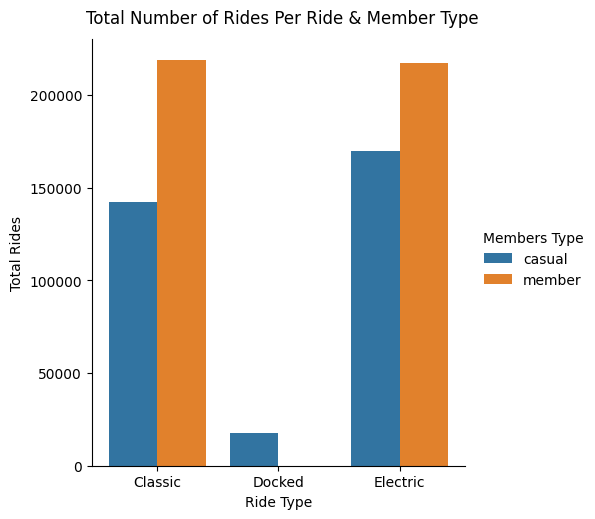

In [156]:
# plot total number of rides per ride type and member type
g = sns.catplot(x="rideable_type", 
            y="total_rides",
            data=ridetype_compar,
            kind="bar",
            ci=None,
            hue="member_casual")

# set title
g.fig.suptitle("Total Number of Rides Per Ride & Member Type",
               y=1.03)
# change legent title
g.legend.set_title("Members Type")
# change xlabel and ylabel
g.set(xlabel="Ride Type",
      ylabel = "Total Rides")
# change x ticks
plt.xticks([0,1,2],["Classic","Docked","Electric"])


plt.plot()

Answer: By looking at the graph we can say that both members and casual customers prefer electric car.

Question: What are the peak times and off peak times in a day and week?

In [157]:
# group by ride day and hour and find total rides
ride_times_df = divvy_df.groupby(["started_day","started_hour"],as_index=False)[["ride_id"]].count()
ride_times_df

,started_day,started_hour,ride_id
0,Friday,0,1222
1,Friday,1,699
2,Friday,2,327
3,Friday,3,215
4,Friday,4,199
...,...,...,...
163,Wednesday,19,4841
164,Wednesday,20,4037
165,Wednesday,21,3157
166,Wednesday,22,2545


In [158]:
# change started hour values to column names 
ride_times_df = pd.crosstab(ride_times_df["started_day"], ride_times_df["started_hour"],values=ride_times_df["ride_id"], aggfunc="mean")
ride_times_df

started_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
started_day,,,,,,,,,,,,,,,,,,,,,
Friday,1222,699,327,215,199,762,3227,3946,4845,3592,...,6343,7524,9359,10684,9484,7034,5003,3927,2814,2133
Monday,1421,689,344,236,247,1001,3033,5258,6385,4363,...,6745,7872,10527,13662,12150,9214,6917,4631,3390,1896
Saturday,2351,2011,1128,533,311,609,1252,1875,3714,5947,...,10629,10626,9717,9132,9179,7976,6047,5373,5240,4454
Sunday,3848,2237,1400,716,461,473,770,1293,2385,4171,...,9153,9272,9619,9218,8472,7148,5712,4017,2806,1780
Thursday,774,375,212,163,203,907,2840,5218,6502,3875,...,4833,6015,9062,11876,10677,8143,6175,4675,3490,2012
Tuesday,979,564,331,191,227,948,2647,4807,5967,3902,...,4734,6027,8863,10920,9229,7393,5794,4257,3228,1624
Wednesday,842,459,250,168,177,907,2491,5179,6329,3155,...,3415,4844,7541,10284,8072,4841,4037,3157,2545,1318


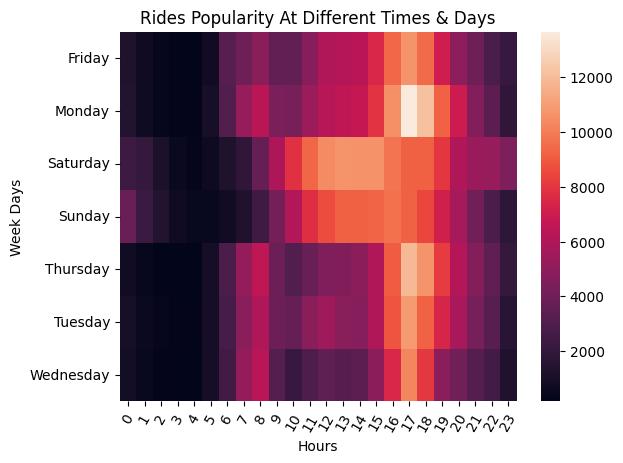

In [159]:
# draw heatmap to show peak hours and off peak hours
g = sns.heatmap(ride_times_df)
# set title
plt.title("Rides Popularity At Different Times & Days")
#set labels
g.set(xlabel="Hours",
      ylabel="Week Days")
# rotate x ticks to 60 degree
plt.xticks(rotation=60)
# show plot
plt.show()

Answers: From Monday to Friday peak times are from 4PM to 7PM and on Saturday, Sunday peak times are from 11AM to 8PM